In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Lettura dataset e test set
data = pd.read_csv("train.csv", sep = ",")
test = pd.read_csv("test_set.csv", sep = ";")
data.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Y
0,39,K1,77516,R1,13,Q1,P1,M1,caucasian,Male,2174,0,40,USA,0
1,50,K2,83311,R1,13,Q2,P2,M2,caucasian,Male,0,0,13,USA,0
2,38,K3,215646,R2,9,Q3,P3,M1,caucasian,Male,0,0,40,USA,0
3,53,K3,234721,R3,7,Q2,P3,M2,black,Male,0,0,40,USA,0
4,28,K3,338409,R1,13,Q2,P4,M3,black,Female,0,0,40,Cuba,0


In [2]:
data.isna().sum()    # check
# Bisogna imputare i valori NaN
test.head()             #correggere separatore


,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Y
0,55,K5,171328,R6,10,Q4,P1,M5,black,Female,0,0,35,USA,0
1,64,K3,144182,R2,9,Q7,P4,M1,caucasian,Female,0,0,23,USA,0
2,34,K3,102858,R2,9,Q5,P1,M5,caucasian,Male,0,0,40,USA,0
3,19,NaN,199495,R6,10,Q1,NaN,M4,caucasian,Male,0,0,60,USA,0
4,58,K3,209438,R6,10,Q3,P5,M5,black,Female,0,0,40,USA,0


In [3]:
# Array con il nome delle colonne del DataFrame
colF = ['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']

# Colonne feature categoriche
colF1 = ['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8']
colF3 = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']
colF5 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
colF6 = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14']
colF7 = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
colF8 = ['caucasian', 'black', 'asian', 'american', 'other']
colF9 = ['Male', 'Female']
colF13 = ['USA', 'Mexico', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala', 'Japan', 'Poland', 'Columbia', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru', 'France', 'Greece', 'Ecuador', 'Ireland', 'Hong', 'Cambodia', 'Caribbean', 'Thailand', 'Laos', 'Yugoslavia', 'Honduras', 'Hungary', 'Scotland', 'Netherlands']

# Codifica delle feature categoriche
data.F1.replace(colF1, [1, 2, 3, 4, 5, 6, 7, 8], inplace = True)
data.F3.replace(colF3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], inplace = True)
data.F5.replace(colF5, [1, 2, 3, 4, 5, 6, 7], inplace = True)
data.F6.replace(colF6, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)
data.F7.replace(colF7, [1, 2, 3, 4, 5, 6], inplace = True)
data.F8.replace(colF8, [1, 2, 3, 4, 5], inplace = True)
data.F9.replace(colF9, [0, 1], inplace = True)
data.F13.replace(colF13, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], inplace = True)


test.F1.replace(colF1, [1, 2, 3, 4, 5, 6, 7, 8], inplace = True)
test.F3.replace(colF3, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], inplace = True)
test.F5.replace(colF5, [1, 2, 3, 4, 5, 6, 7], inplace = True)
test.F6.replace(colF6, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], inplace = True)
test.F7.replace(colF7, [1, 2, 3, 4, 5, 6], inplace = True)
test.F8.replace(colF8, [1, 2, 3, 4, 5], inplace = True)
test.F9.replace(colF9, [0, 1], inplace = True)
test.F13.replace(colF13, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], inplace = True)

In [4]:
# Preprocessing

# Suddivisione del target dal resto delle feature
x_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values
print(x_train.shape)
print(y_train.shape)

x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values
print(x_test.shape)
print(y_test.shape)
# Creazione insiemi di train e test con un rapporto 75% - 25%
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 258, stratify = y)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

# print(np.unique(y, return_counts=True)[1]/len(y))
# print(np.unique(y_train, return_counts=True)[1]/len(y_train))
# print(np.unique(y_test, return_counts=True)[1]/len(y_test))

(24910, 14)
(24910,)
(7651, 14)
(7651,)


In [5]:
np.argwhere(np.isnan(x_train))


array([[   14,    13],
       [   27,     1],
       [   27,     6],
       ...,
       [24894,     6],
       [24902,     1],
       [24902,     6]], dtype=int64)

In [6]:
np.argwhere(np.isnan(x_test))

array([[   3,    1],
       [   3,    6],
       [  13,   13],
       ...,
       [7631,    6],
       [7632,    1],
       [7632,    6]], dtype=int64)

In [7]:
# Imputazione dei valori NaN tramite SimpleImputer, con la strategia che sostituisce i valori mancanti con la moda dei valori della feature
print("SimpleImputer")
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
x_train_notnan = imp.fit_transform(x_train)
x_test_notnan = imp.transform(x_test)
print(x_train_notnan[pd.isna(x_train[:,0]),0][0:10])
print(x_test_notnan[pd.isna(x_test[:,0]),0][0:10])

SimpleImputer
[]
[]


In [8]:
np.argwhere(np.isnan(x_train_notnan))

array([], shape=(0, 2), dtype=int64)

In [9]:
np.argwhere(np.isnan(x_test_notnan))

array([], shape=(0, 2), dtype=int64)

In [10]:
# Creazione DataFrame da insiemi di train e test dopo l'imputazione dei valori mancanti 
training_set_df = pd.DataFrame(x_train_notnan, columns = colF)
test_set_df = pd.DataFrame(x_test_notnan, columns = colF)

In [11]:
training_set_df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,39.0,1.0,77516.0,1.0,13.0,1.0,1.0,1.0,1.0,0.0,2174.0,0.0,40.0,1.0
1,50.0,2.0,83311.0,1.0,13.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,13.0,1.0
2,38.0,3.0,215646.0,2.0,9.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,40.0,1.0
3,53.0,3.0,234721.0,3.0,7.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,40.0,1.0
4,28.0,3.0,338409.0,1.0,13.0,2.0,4.0,3.0,2.0,1.0,0.0,0.0,40.0,9.0


In [12]:
test_set_df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,55.0,5.0,171328.0,6.0,10.0,4.0,1.0,5.0,2.0,1.0,0.0,0.0,35.0,1.0
1,64.0,3.0,144182.0,2.0,9.0,7.0,4.0,1.0,1.0,1.0,0.0,0.0,23.0,1.0
2,34.0,3.0,102858.0,2.0,9.0,5.0,1.0,5.0,1.0,0.0,0.0,0.0,40.0,1.0
3,19.0,3.0,199495.0,6.0,10.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,60.0,1.0
4,58.0,3.0,209438.0,6.0,10.0,3.0,5.0,5.0,2.0,1.0,0.0,0.0,40.0,1.0


In [13]:
# Codifica OneHot contemporaneamente su training_set_df e test_set_df
OneHotF1 = pd.get_dummies(training_set_df.F1)
OneHotTestF1 = pd.get_dummies(test_set_df.F1)
OneHotF3 = pd.get_dummies(training_set_df.F3)
OneHotTestF3 = pd.get_dummies(test_set_df.F3)
OneHotF5 = pd.get_dummies(training_set_df.F5)
OneHotTestF5 = pd.get_dummies(test_set_df.F5)
OneHotF6 = pd.get_dummies(training_set_df.F6)
OneHotTestF6 = pd.get_dummies(test_set_df.F6)
OneHotF7 = pd.get_dummies(training_set_df.F7)
OneHotTestF7 = pd.get_dummies(test_set_df.F7)
OneHotF8 = pd.get_dummies(training_set_df.F8)
OneHotTestF8 = pd.get_dummies(test_set_df.F8)
OneHotF9 = pd.get_dummies(training_set_df.F9)
OneHotTestF9 = pd.get_dummies(test_set_df.F9)
OneHotF13 = pd.get_dummies(training_set_df.F13)
OneHotTestF13 = pd.get_dummies(test_set_df.F13)

for i in range (1, len(colF1)):
    OneHotF1 = OneHotF1.rename(columns = {i: colF1[i-1]})
    OneHotTestF1 = OneHotTestF1.rename(columns = {i: colF1[i-1]})
for i in range (1, len(colF3)):
    OneHotF3 = OneHotF3.rename(columns = {i: colF3[i-1]})
    OneHotTestF3 = OneHotTestF3.rename(columns = {i: colF3[i-1]})
for i in range (1, len(colF5)):
    OneHotF5 = OneHotF5.rename(columns = {i: colF5[i-1]})
    OneHotTestF5 = OneHotTestF5.rename(columns = {i: colF5[i-1]})
for i in range (1, len(colF6)):
    OneHotF6 = OneHotF6.rename(columns = {i: colF6[i-1]})
    OneHotTestF6 = OneHotTestF6.rename(columns = {i: colF6[i-1]})
for i in range (1, len(colF7)):
    OneHotF7 = OneHotF7.rename(columns = {i: colF7[i-1]})
    OneHotTestF7 = OneHotTestF7.rename(columns = {i: colF7[i-1]})
for i in range (1, len(colF8)):
    OneHotF8 = OneHotF8.rename(columns = {i: colF8[i-1]})
    OneHotTestF8 = OneHotTestF8.rename(columns = {i: colF8[i-1]})
for i in range (1, len(colF9)):
    OneHotF9 = OneHotF9.rename(columns = {i: colF9[i-1]})
    OneHotTestF9 = OneHotTestF9.rename(columns = {i: colF9[i-1]})
for i in range (1, len(colF13)):
    OneHotF13 = OneHotF13.rename(columns = {i: colF13[i-1]})
    OneHotTestF13 = OneHotTestF13.rename(columns = {i: colF13[i-1]})

In [14]:
training_set_df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,39.0,1.0,77516.0,1.0,13.0,1.0,1.0,1.0,1.0,0.0,2174.0,0.0,40.0,1.0
1,50.0,2.0,83311.0,1.0,13.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,13.0,1.0
2,38.0,3.0,215646.0,2.0,9.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,40.0,1.0
3,53.0,3.0,234721.0,3.0,7.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,40.0,1.0
4,28.0,3.0,338409.0,1.0,13.0,2.0,4.0,3.0,2.0,1.0,0.0,0.0,40.0,9.0


In [15]:
test_set_df.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,55.0,5.0,171328.0,6.0,10.0,4.0,1.0,5.0,2.0,1.0,0.0,0.0,35.0,1.0
1,64.0,3.0,144182.0,2.0,9.0,7.0,4.0,1.0,1.0,1.0,0.0,0.0,23.0,1.0
2,34.0,3.0,102858.0,2.0,9.0,5.0,1.0,5.0,1.0,0.0,0.0,0.0,40.0,1.0
3,19.0,3.0,199495.0,6.0,10.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,60.0,1.0
4,58.0,3.0,209438.0,6.0,10.0,3.0,5.0,5.0,2.0,1.0,0.0,0.0,40.0,1.0


In [16]:
# Creazione newdf e newdftest con la sostituzione delle colonne generate con la codifica
training_set_df = pd.concat([training_set_df, OneHotF1, OneHotF3, OneHotF5, OneHotF6, OneHotF7, OneHotF8, OneHotF9, OneHotF13], axis = 1)
test_set_df = pd.concat([test_set_df, OneHotTestF1, OneHotTestF3, OneHotTestF5, OneHotTestF6, OneHotTestF7, OneHotTestF8, OneHotTestF9, OneHotTestF13], axis = 1)

training_set_df = training_set_df.drop(["F1", "F3", "F5", "F6", "F7", "F8", "F9", "F13"], axis = 1)
test_set_df = test_set_df.drop(["F1", "F3", "F5", "F6", "F7", "F8", "F9", "F13"], axis = 1)

In [17]:
print(training_set_df.iloc[:,-1])

0        0
1        0
2        0
3        0
4        0
        ..
24905    0
24906    0
24907    0
24908    0
24909    0
Name: 40.0, Length: 24910, dtype: uint8


In [18]:
training_set_df = training_set_df.drop(40.0, axis = 1)
training_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,Ireland,Hong,Cambodia,Caribbean,Thailand,Laos,Yugoslavia,Honduras,Hungary,Scotland
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,Ireland,Hong,Cambodia,Caribbean,Thailand,Laos,Yugoslavia,Honduras,Hungary,Scotland
0,55.0,171328.0,10.0,0.0,0.0,35.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64.0,144182.0,9.0,0.0,0.0,23.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,34.0,102858.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,19.0,199495.0,10.0,0.0,0.0,60.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,209438.0,10.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


(array([  565.,  1669.,  1793., 13595.,  2375.,  2926.,  1397.,   336.,
          155.,    99.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

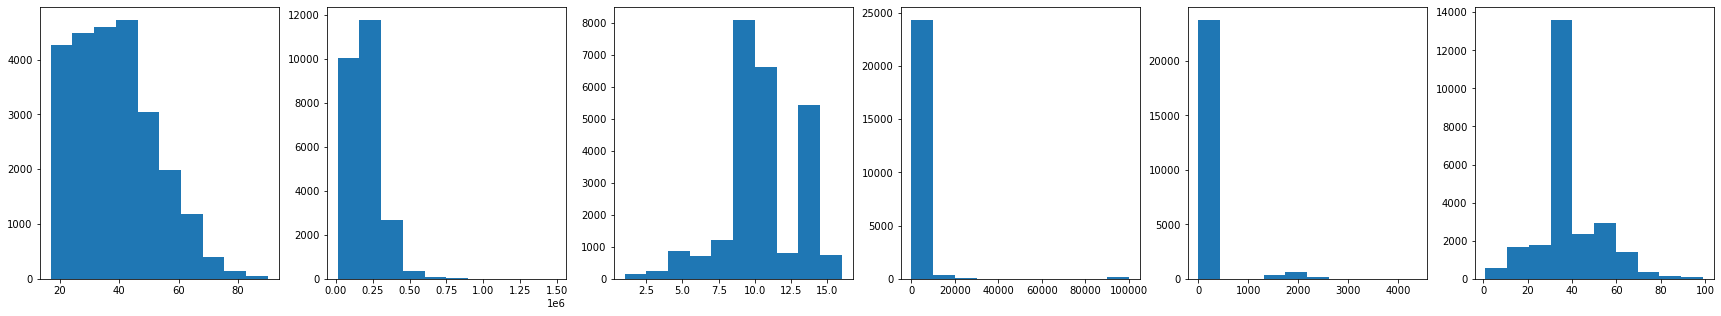

In [20]:
fig, axs = plt.subplots(1, 6, figsize = (30,5))
axs[0].hist(training_set_df.F0)
axs[1].hist(training_set_df.F2)
axs[2].hist(training_set_df.F4)
axs[3].hist(training_set_df.F10)
axs[4].hist(training_set_df.F11)
axs[5].hist(training_set_df.F12)

# L'unico outlier dovuto a un errore nel dataset è quello in F2

In [21]:
# Individuazione e rimozione degli outlier (in F2) nel training set
z_scores = stats.zscore(training_set_df["F2"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
training_set_df = training_set_df[filtered_entries]

training_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,Ireland,Hong,Cambodia,Caribbean,Thailand,Laos,Yugoslavia,Honduras,Hungary,Scotland
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Frequency'>

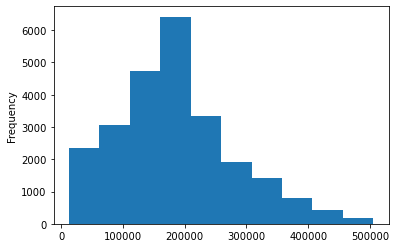

In [22]:
# Verifica rimozione outlier
training_set_df["F2"].plot.hist()

(array([ 171.,  523.,  524., 4140.,  744.,  951.,  399.,  112.,   47.,
          40.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

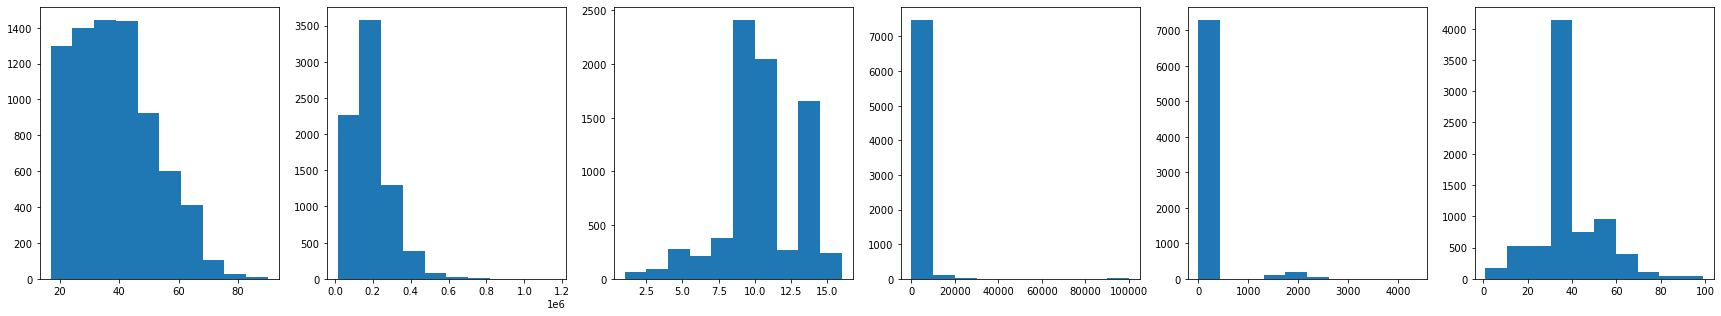

In [23]:
fig, axs = plt.subplots(1, 6, figsize = (30,5))
axs[0].hist(test_set_df.F0)
axs[1].hist(test_set_df.F2)
axs[2].hist(test_set_df.F4)
axs[3].hist(test_set_df.F10)
axs[4].hist(test_set_df.F11)
axs[5].hist(test_set_df.F12)

# L'unico outlier dovuto a un errore nel dataset è quello in F2

In [24]:
# Individuazione e rimozione degli outlier (in F2) nel test set
z_scores = stats.zscore(test_set_df["F2"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
test_set_df = test_set_df[filtered_entries]

test_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,Ireland,Hong,Cambodia,Caribbean,Thailand,Laos,Yugoslavia,Honduras,Hungary,Scotland
0,55.0,171328.0,10.0,0.0,0.0,35.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64.0,144182.0,9.0,0.0,0.0,23.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,34.0,102858.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,19.0,199495.0,10.0,0.0,0.0,60.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,209438.0,10.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Bilanciamento

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

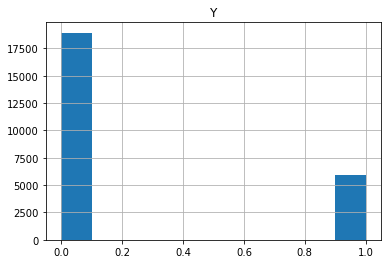

In [26]:
# Controllo bilanciamento y_train
y_training_df = pd.DataFrame(y_train, columns = ["Y"])
y_training_df.hist()

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

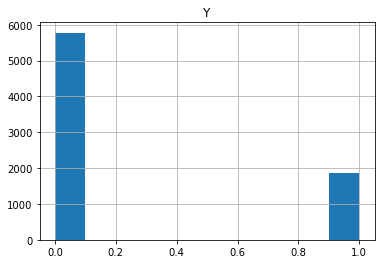

In [27]:
# Controllo bilanciamento y_test
y_test_df = pd.DataFrame(y_test, columns = ["Y"])
y_test_df.hist()

In [28]:
# y_train e y_test sono sbilanciate
# SMOTE
smote = SMOTE(random_state = 0, sampling_strategy = 'not majority', k_neighbors = 10, n_jobs = -1)
x_train_notnan, y_train = smote.fit_resample(x_train_notnan, y_train)
print(x_train_notnan.shape, y_train.shape)
print(x_train_notnan)

smote = SMOTE(random_state = 0, sampling_strategy = 'not majority', k_neighbors = 10, n_jobs = -1)
x_test_notnan, y_test = smote.fit_resample(x_test_notnan, y_test)
print(x_test_notnan.shape, y_test.shape)
print(x_test_notnan)

(37882, 14) (37882,)
[[3.90000000e+01 1.00000000e+00 7.75160000e+04 ... 0.00000000e+00
  4.00000000e+01 1.00000000e+00]
 [5.00000000e+01 2.00000000e+00 8.33110000e+04 ... 0.00000000e+00
  1.30000000e+01 1.00000000e+00]
 [3.80000000e+01 3.00000000e+00 2.15646000e+05 ... 0.00000000e+00
  4.00000000e+01 1.00000000e+00]
 ...
 [4.12014674e+01 3.00000000e+00 1.87594471e+05 ... 0.00000000e+00
  5.15970651e+01 1.00000000e+00]
 [6.70000000e+01 4.81266705e+00 1.05809697e+05 ... 2.39200000e+03
  6.11477822e+01 1.00000000e+00]
 [4.08505047e+01 1.68040376e+00 1.88715113e+05 ... 0.00000000e+00
  3.75515141e+01 1.00000000e+00]]
(11558, 14) (11558,)
[[5.50000000e+01 5.00000000e+00 1.71328000e+05 ... 0.00000000e+00
  3.50000000e+01 1.00000000e+00]
 [6.40000000e+01 3.00000000e+00 1.44182000e+05 ... 0.00000000e+00
  2.30000000e+01 1.00000000e+00]
 [3.40000000e+01 3.00000000e+00 1.02858000e+05 ... 0.00000000e+00
  4.00000000e+01 1.00000000e+00]
 ...
 [4.15764684e+01 2.68403346e+00 1.16700213e+05 ... 0.000

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

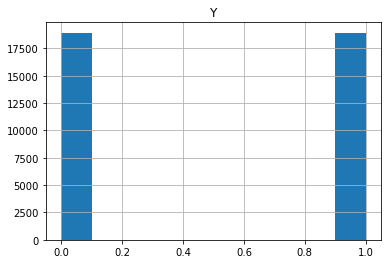

In [29]:
# Controllo bilanciamento y_train
y_training_df = pd.DataFrame(y_train, columns = ["Y"])
y_training_df.hist()

array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

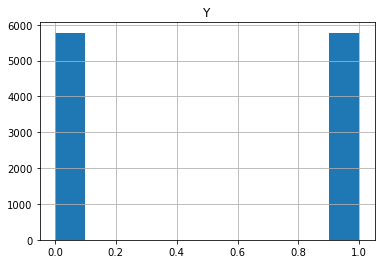

In [30]:
# Controllo bilanciamento y_test
y_test_df = pd.DataFrame(y_test, columns = ["Y"])
y_test_df.hist()

In [31]:
# Scaling con StandardScaler

# print("StandardScaler")
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train_notnan)
# x_test_scaled = scaler.transform(x_test_notnan)

# print("Media distribuzione di partenza: {}".format(np.mean(x_train_notnan, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_train_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_train_notnan, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_train_scaled, axis=0)))

# print("Media distribuzione di partenza: {}".format(np.mean(x_test_notnan, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_test_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_test_notnan, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_test_scaled, axis=0)))

In [32]:
# # Scaling con Robust Scaler
# print("Robust Scaler")
# scaler = RobustScaler()
# x_train_scaled = scaler.fit_transform(x_train_notnan)
# x_test_scaled = scaler.transform(x_test_notnan)

# print("Media distribuzione di partenza: {}".format(np.mean(x_train_notnan, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_train_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_train_notnan, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_train_scaled, axis=0)))

# print("Media distribuzione di partenza: {}".format(np.mean(x_test_notnan, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_test_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_test_notnan, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_test_scaled, axis=0)))

In [33]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_notnan)
x_test_scaled = scaler.transform(x_test_notnan)

print(np.min(x_train_scaled,axis=0))
print(np.max(x_train_scaled,axis=0))

print(np.min(x_test_scaled,axis=0))
print(np.max(x_test_scaled,axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.         0.00100786 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[1.         1.         0.78040097 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.97435897]


Best: 0.901668 using {'criterion': 'entropy', 'n_estimators': 100}
0.8942723654611524


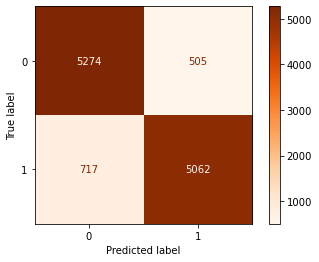

In [34]:
classifierRF = RandomForestClassifier()

grid = dict()
grid['n_estimators'] = [10, 25, 100]
grid['criterion'] = ['gini', 'entropy']
# grid['n_estimators'] = [100]
# grid['criterion'] = ['entropy']

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# define the grid search procedure
grid_search = GridSearchCV(estimator = classifierRF, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy')

# execute the grid search
grid_fit = grid_search.fit(x_train_scaled, y_train)

# execute the grid search
y_pred_rf = grid_search.predict(x_test_scaled)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_fit.best_score_ , grid_fit.best_params_))

# summarize all scores that were evaluated
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

CM_FOR = confusion_matrix(y_test, y_pred_rf)
PercFOR = (CM_FOR[0,0]+CM_FOR[1,1])/CM_FOR.sum()

cmd = ConfusionMatrixDisplay(CM_FOR)
cmd.plot(cmap = "Oranges")

print(PercFOR)